In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import scipy.stats as sstats
from sklearn.model_selection import train_test_split
from sklearn.cluster import Birch
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from tqdm import tqdm
from sklearn.ensemble import GradientBoostingClassifier

from KNN import KNN

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

data_batch_1 = unpickle('cifar10/data_batch_1')

db1_labels = np.array(data_batch_1[b'labels'])
db1_data = np.array(data_batch_1[b'data'])

og_train_x, og_test_x, train_y, test_y = train_test_split(db1_data, db1_labels, test_size=0.33)

og_train_x = og_train_x.reshape(-1, 32*32, 3)
og_test_x = og_test_x.reshape(-1, 32*32, 3)

In [3]:
def to_grayscale(x):
    new_x = x[:,:,0] * 0.3 + x[:, :, 1] * 0.59 + x[:, :, 2] * 0.11
    return new_x.astype(int)

In [4]:
train_x = to_grayscale(og_train_x)
test_x = to_grayscale(og_test_x)

In [12]:
clf = GradientBoostingClassifier(max_depth=1, n_estimators=100)

In [13]:
%%time
clf.fit(train_x, train_y)

CPU times: user 1min 39s, sys: 318 ms, total: 1min 39s
Wall time: 1min 40s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [14]:
preds = clf.predict(test_x)

In [15]:
np.count_nonzero(preds == test_y) / len(test_y)

0.3557575757575758

In [16]:
MDS = np.arange(1, 7)
accs = []
for max_depth in tqdm(MDS, position=0, leave=True):
    clf = GradientBoostingClassifier(max_depth=max_depth)    
    clf.fit(train_x, train_y)
    preds = clf.predict(test_x)
    acc = np.count_nonzero(preds == test_y) / len(test_y)
    accs.append(acc)
    
plt.plot(MDS, accs)

 67%|██████▋   | 4/6 [20:26<10:11, 305.52s/it]

KeyboardInterrupt: 

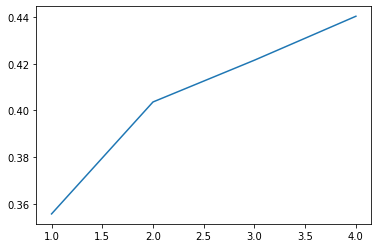

In [18]:
plt.plot(MDS[:len(accs)], accs)